In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [3]:
np.random.seed(2023)


In [4]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_nums = len(class_names)
print(class_nums)
input_shape = (28,28,1)

10


In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(type(X_train), X_train.dtype)

<class 'numpy.ndarray'> uint8


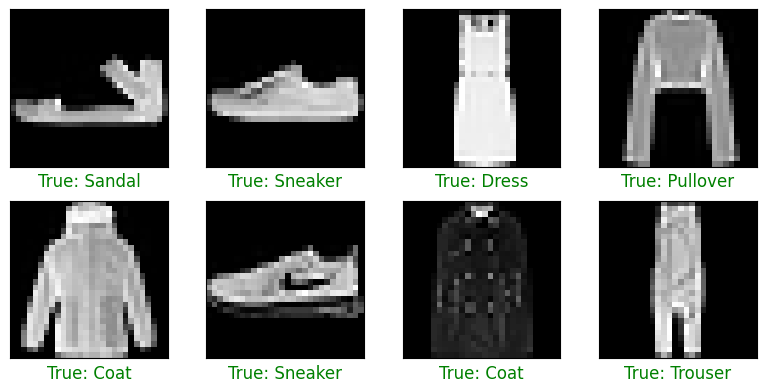

In [7]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) -> None:
    # Số dòng và số cột trong lưới
    nrows, ncols = 2, 4
    # Tạo một lưới subplot với kích thước cố định
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4))
    
    # Số lượng ảnh trong dữ liệu
    len_x = x_data.shape[0]

    # Lặp qua từng ô trong lưới subplot
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]  # Vị trí của subplot trong lưới
        img_idx = random.randint(0, len_x)  # Chọn ngẫu nhiên một ảnh từ dữ liệu

        # Hiển thị ảnh trong subplot
        ax.imshow(x_data[img_idx], cmap='gray')

        # Loại bỏ các dấu gạch trục
        ax.set(xticks=[], yticks=[])

        color = 'green'  # Màu của nhãn thực tế

        # Nếu có thông tin dự đoán từ mô hình (y_proba), thêm thông tin dự đoán vào chú thích
        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            predicted_label = class_names[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color
            predicted_label_str = f"\nPredicted: {predicted_label}"

        # Tạo tiêu đề cho ảnh, bao gồm nhãn thực tế và/hoặc thông tin dự đoán
        true_label_str = f"True: {class_names[y_data[img_idx]]}"
        img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str

        # Thêm tiêu đề vào trục x của subplot
        ax.set_xlabel(img_title, color=color, fontsize=12)

    # Tạo khoảng trắng giữa các subplot và hiển thị lưới subplot
    plt.tight_layout()
    plt.show()

# Gọi hàm với dữ liệu huấn luyện (X_train và y_train)
plot_data(X_train, y_train)


In [8]:
# Convert to float32 & Scale images to the [0, 1] range for training
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (60000, 28, 28) => (60000, 28, 28, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [10]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), #to convert each input image into a 1D array
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(class_nums, activation="softmax")
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
## Train the model
"""

epochs = 10
batch_size = 128
history = model.fit(X_train,
                    y_train_label,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    )

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.5595 - accuracy: 0.7968 - val_loss: 0.4534 - val_accuracy: 0.8277
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3811 - accuracy: 0.8590 - val_loss: 0.3650 - val_accuracy: 0.8658
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3398 - accuracy: 0.8746 - val_loss: 0.3257 - val_accuracy: 0.8843
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3093 - accuracy: 0.8854 - val_loss: 0.3372 - val_accuracy: 0.8777
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2937 - accuracy: 0.8904 - val_loss: 0.3238 - val_accuracy: 0.8853
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2776 - accuracy: 0.8977 - val_loss: 0.3482 - val_accuracy: 0.8822
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2652 - accuracy: 0.9007 - val_loss: 0.3379 - val_accuracy: 0.8837
Epoch 

In [13]:
history_dict = history.history

In [14]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

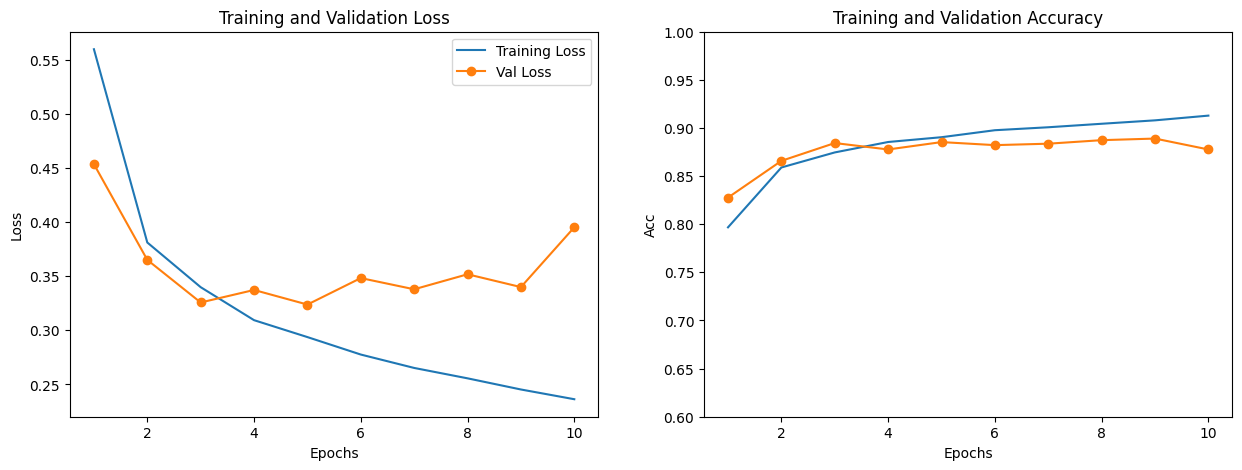

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(epochs)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, marker='o', label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, marker='o', label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.6, 1])
#  plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()

In [16]:
"""
## Evaluate the trained model
"""

score = model.evaluate(X_test, y_test_label, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.40499937534332275
Test accuracy: 0.8718000054359436


In [17]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)
pd.DataFrame([[*y_p, class_names[y_l]] for y_p, y_l in zip(y_proba.round(3), y_test[:3])],
              columns=[*class_names, 'Label'])


1/1 [==============================] - 0s 108ms/step


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Ankle boot
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pullover
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trouser


In [18]:
predictions = np.argmax(y_proba, axis=1)
print([class_names[pred_idx] for pred_idx in predictions])

['Ankle boot', 'Pullover', 'Trouser']


In [19]:
y_proba = model.predict(X_test)


313/313 [==============================] - 0s 1ms/step


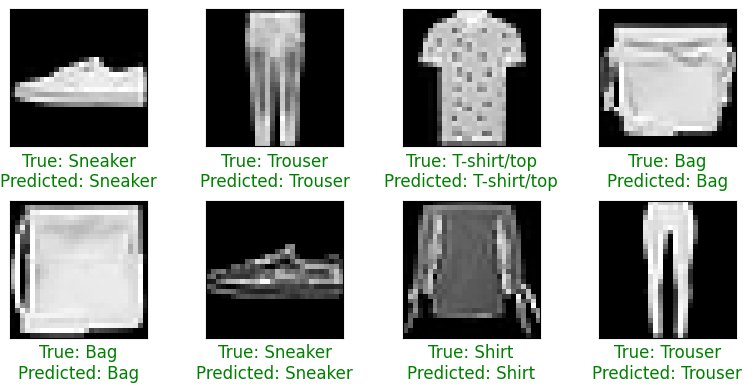

In [20]:
plot_data(X_test, y_test, y_proba)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.argmax(y_proba, axis=1), target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.84      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.75      0.83      0.79      1000
       Dress       0.93      0.83      0.88      1000
        Coat       0.74      0.82      0.78      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.73      0.56      0.63      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.89      0.99      0.94      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [22]:
model.save('model.h5')